## Develop central helix track cuts 

## Preamble

In [27]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore") 

# Loader module
sys.path.extend(["../../src/core", "../../src/utils"])
from io_manager import Load

# Common tools
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# pyutils tools
from pyutils.pyprint import Print
from pyutils.pyplot import Plot
from pyutils.pyvector import Vector
from pyutils.pyselect import Select

# Load data

In [3]:
in_path="/exp/mu2e/data/users/sgrant/mu2e-cosmic/central_helix_data/nts.mu2e.OffSpillTriggered-CH.MDC2020as_best_v1_3_v06_05_00/"
data = Load(in_path=in_path).load_array_parquet("events.parquet")

[Load] ✅ Initialised with out_path=/exp/mu2e/data/users/sgrant/mu2e-cosmic/central_helix_data/nts.mu2e.OffSpillTriggered-CH.MDC2020as_best_v1_3_v06_05_00/
[Load] ✅ Successfully loaded ak.Array from /exp/mu2e/data/users/sgrant/mu2e-cosmic/central_helix_data/nts.mu2e.OffSpillTriggered-CH.MDC2020as_best_v1_3_v06_05_00/events.parquet


## Preselection 

Many events have no tracks (see below), let's filter them out 

In [34]:
printer = Print()
# printer.print_n_events(data, 1) # one event

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1


In [12]:
# Has tracks condition
has_trks = ak.num(data["trkfit"]["trksegs"], axis=1) > 0
data["has_trks"] = has_trks

In [13]:
n_events = len(data)
data_cut = ak.copy(data)
data_cut = data[has_trks]
print(f"{len(data_cut)}/{len(data)} events have tracks")
# Print().print_n_events(data_cut, n_events=10)

1548279/18951410 events have tracks


## Plotting 

In [31]:
plotter = Plot()
vector = Vector()
selector = Select()

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
[pyvector] ⭐️ Initialised Vector with verbosity = 1


[pyselect] ✅ Returning mask for trksegs with sid = 0
[pyvector] ✅ Created 3D 'mom' vector
[pyvector] ✅ Got 'mom' magnitude


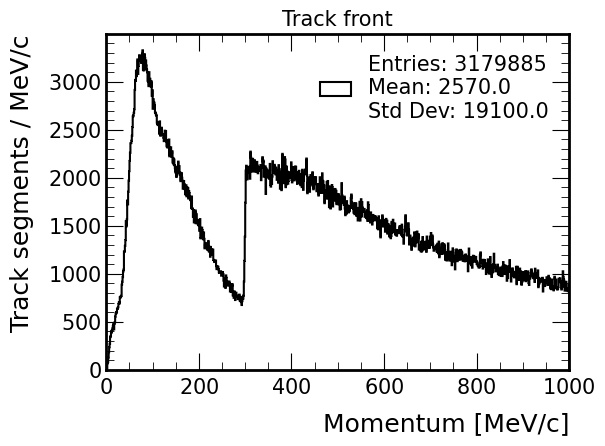

In [33]:
at_trk_front = selector.select_surface(data_cut["trkfit"], surface_name="TT_Front")
mom_mag_front = vector.get_mag(data_cut["trkfit"]["trksegs"][at_trk_front], "mom")

plotter.plot_1D(
    ak.flatten(mom_mag_front, axis=None),
    nbins=1000,
    xmin=0,
    xmax=1000,
    xlabel="Momentum [MeV/c]",
    ylabel="Track segments / MeV/c",
    title="Track front"
)